# Import relevant libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Decision tree classifiers

In [9]:
from sklearn.datasets import load_iris

iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
data.drop(columns=['sepal length (cm)', 'sepal width (cm)'], inplace=True)
data

,petal length (cm),petal width (cm),target
0,1.4,0.2,0.0
1,1.4,0.2,0.0
2,1.3,0.2,0.0
3,1.5,0.2,0.0
4,1.4,0.2,0.0
...,...,...,...
145,5.2,2.3,2.0
146,5.0,1.9,2.0
147,5.2,2.0,2.0
148,5.4,2.3,2.0


In [10]:
X = data.drop(columns=['target']).values
y = data.target.values

In [11]:
# Instantiate and train model
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=2)

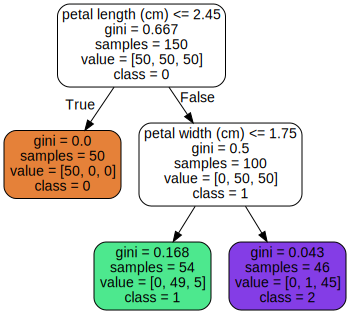

In [12]:
import graphviz

# Export model graph
from sklearn.tree import export_graphviz
export_graphviz(tree_clf, out_file="iris_tree.dot", 
                feature_names=data.drop(columns=['target']).columns,
                class_names=['0','1','2'], 
                rounded=True, filled=True)

# Import model graph
with open("iris_tree.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

In [13]:
# Calculate gini of root node
1 - (50/150)**2 - (50/150)**2 - (50/150)**2

0.6666666666666665

In [14]:
# Calcultate gini green leaf
1 - 0**2 - (49/54)**2 - (5/54)**2

0.1680384087791495

In [15]:
# Let's predict the class of a new flower
print(tree_clf.predict([[4,1]]))

[1.]


In [16]:
# Predict proba
print(tree_clf.predict_proba([[4,1]]))

[[0.         0.90740741 0.09259259]]


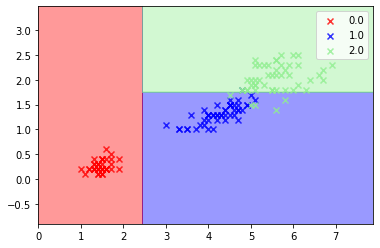

In [17]:
# hand made function to plot all predictions
from utils.plots import plot_decision_regions

# hand made function to plot all predictions
plot_decision_regions(X, y, classifier=tree_clf)

## DecisionTreeRegressor

In [18]:
import pandas as pd
data = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/flats.csv')
data.head(3)

,price,bedrooms,surface,floors
0,274.0,3,1830,2.0
1,500.0,4,2120,1.0
2,320.0,3,1260,1.0


In [19]:
X = data[['bedrooms','surface','floors']]
y = data['price']

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

tree = DecisionTreeRegressor()

cv_results = cross_validate(tree, X, y, scoring = "r2", cv=5)

# custom method
# plot_histogram_cv_results(cv_results)

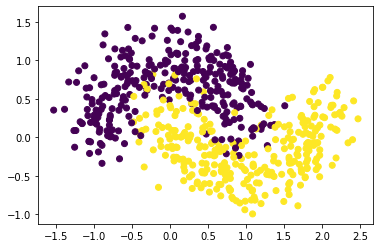

In [21]:
from sklearn.datasets import make_moons
n=600
X_moon,y_moon = make_moons(n_samples=n, noise=0.25, random_state=0)
plt.scatter(X_moon[:,0], X_moon[:,1], c=y_moon)

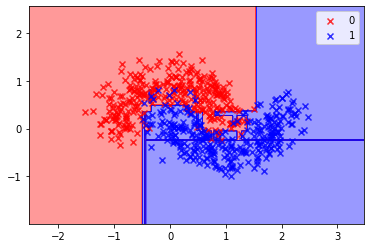

In [22]:
from sklearn.tree import DecisionTreeClassifier
from ipywidgets import interact

#@interact(max_depth=10)
def plot_classifier(max_depth):
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_moon, y_moon)
    plot_decision_regions(X_moon, y_moon, classifier=clf)

plot_classifier(max_depth=10)

## Bagging

In [23]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100)

cv_results = cross_validate(forest, X, y, scoring = "r2", cv=5)

# plot_histogram_cv_results(cv_results)

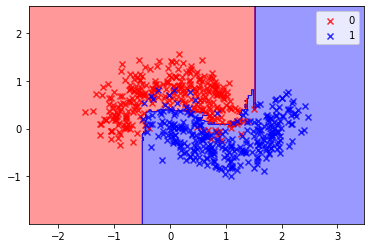

In [24]:
from sklearn.ensemble import RandomForestClassifier
#@interact(max_depth=5)
def plot_classifier(max_depth):
    cls = RandomForestClassifier(max_depth=max_depth)
    cls.fit(X_moon, y_moon)
    plot_decision_regions(X_moon, y_moon, classifier=cls)

plot_classifier(max_depth=5)

**Can apply bagging to other samples**

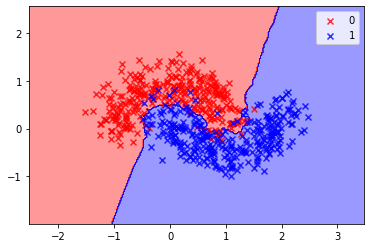

In [29]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

weak_learner = KNeighborsClassifier(n_neighbors=3)
bagged_model = BaggingClassifier(weak_learner, n_estimators=40)

bagged_model.fit(X_moon, y_moon)
plot_decision_regions(X_moon, y_moon, classifier=bagged_model)

**Out of bag score**

In [25]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression


bagged_model = BaggingRegressor(LinearRegression(), 
                                n_estimators=50,
                                oob_score=True)

bagged_model.fit(X,y).oob_score_

0.4972271747262972

**Notice**

In [33]:
RandomForestClassifier(n_estimators=100)
BaggingClassifier(DecisionTreeClassifier(), n_estimators=100)  # similar (but slightly less optimized)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [34]:
BaggingRegressor(RandomForestClassifier(), n_estimators=100)  # stupid! 10,000 trees to train!

BaggingRegressor(base_estimator=RandomForestClassifier(), n_estimators=100)

## Adaboost

In [26]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=3),
    n_estimators=50)

cv_results = cross_validate(adaboost, X, y, scoring = "r2", cv=5)

# plot_histogram_cv_results(cv_results)

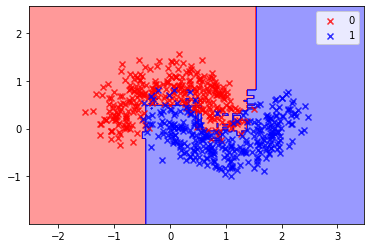

In [36]:
from sklearn.ensemble import AdaBoostClassifier

#@interact(n_estimators=[10, 30, 50,100], max_depth=3)
def plot_classifier(n_estimators, max_depth):
    model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth),
                               n_estimators=n_estimators)    
    model.fit(X_moon, y_moon)
    plot_decision_regions(X_moon, y_moon, classifier=model)
    
plot_classifier(n_estimators=50, max_depth=3)

**sklearn GradientBoostingRegressor and GradientBoostingClassifier***

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(
    n_estimators=100, 
    learning_rate=0.1,
    max_depth=3
)

**XGBOOST**

In [28]:
X_train = X_moon
y_train = y_moon

In [30]:
from xgboost import XGBRegressor


xgb_reg = XGBRegressor(max_depth=10, n_estimators=100, learning_rate=0.1)

xgb_reg.fit(X_train, y_train,
    # evaluate loss at each iteration
    eval_set=[(X_train, y_train), (X_val, y_val)],  
    # stop iterating when eval loss increases 5 times in a row
    early_stopping_rounds=5
)

y_pred = xgb_reg.predict(X_val)

**Or integrate it into scikit-learn**

In [42]:
from sklearn.pipeline import make_pipeline

pipe_xgb = make_pipeline(xgb_reg)
cv_results = cross_validate(pipe_xgb,X,y,cv=10,scoring='r2')

## Stacking

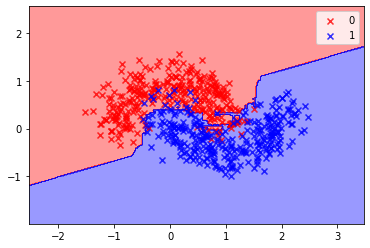

In [43]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

forest = RandomForestClassifier()
logreg = LogisticRegression()

ensemble = VotingClassifier(
    estimators = [("rf", forest),("lr", logreg)],
    voting = 'soft', # to use predict_proba of each classifier before voting
    weights = [1,1] # to equally weight forest and logreg in the vote
)
ensemble.fit(X_moon, y_moon)
plot_decision_regions(X_moon, y_moon, classifier=ensemble)

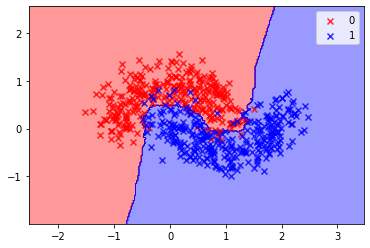

In [44]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier

ensemble = StackingClassifier(
    estimators = [("rf", RandomForestClassifier()),
                  ("knn", KNeighborsClassifier(n_neighbors=10))],
    final_estimator = LogisticRegression())

ensemble.fit(X_moon, y_moon)
plot_decision_regions(X_moon, y_moon, classifier=ensemble)